In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV




# Load Data and check for missing values

In [3]:
# load the data into a pandas dataframe

data_path = r"C:\Users\trush\OneDrive\Documents\WFU Grad School Info\BAN 6025 Machine Learning\Ensemble Models\diabetes_health.csv"
df = pd.read_csv(data_path)

# preview data
df.info()

# total count of NaN values
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

# Preprocess Data


*   Drop unnecessary variables
*   Convert target to numeric




In [4]:

# Convert response from an integer to a categorical variable
df['diabetes_binary'] = df['diabetes_binary'].astype('category')
df.head()



,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


# Split data into training and test sets

Before splitting
*   Separate X and y variables into separate data frames
*   Create dummy variables



In [5]:
# split the data into training and testing sets
X = df.drop(['diabetes_binary'], axis=1)
X = pd.get_dummies(X, columns=['Age', 'Education', 'Income'], drop_first=True, dtype='float')

y = df['diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

X_train.info()
y_train.info()




<class 'pandas.core.frame.DataFrame'>
Index: 177576 entries, 231121 to 195178
Data columns (total 42 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                177576 non-null  int64  
 1   HighChol              177576 non-null  int64  
 2   CholCheck             177576 non-null  int64  
 3   BMI                   177576 non-null  int64  
 4   Smoker                177576 non-null  int64  
 5   Stroke                177576 non-null  int64  
 6   HeartDiseaseorAttack  177576 non-null  int64  
 7   PhysActivity          177576 non-null  int64  
 8   Fruits                177576 non-null  int64  
 9   Veggies               177576 non-null  int64  
 10  HvyAlcoholConsump     177576 non-null  int64  
 11  AnyHealthcare         177576 non-null  int64  
 12  NoDocbcCost           177576 non-null  int64  
 13  GenHlth               177576 non-null  int64  
 14  MentHlth              177576 non-null  int64  
 15  

# Decision Tree  
We will use 3 parameters to control the growth of the tree

- **max_depth** determines the maximum number of levels for the tree.  Smaller values help to prevent overfitting.  Default value = None

- **min_samples_leaf** determines the minimum number of observations that must remain in a leaf.  If a split leaves fewer than this number of observations, the split cannot be performed.  Larger values help to prevent overfitting.  Default value = 1.

- **ccp_alpha** is the cost complexity parameter and can be used for post-pruning the tree to help prevent overfitting.  Default value = 0.  Larger values yield a smaller tree.

In [ ]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(max_depth = 25, min_samples_leaf=10, ccp_alpha = 0.001)

# fit the model to the training data
dt.fit(X_train, y_train)

# this code can be used to produce a textual representation of the tree if desired
#text_rep = tree.export_text(dt)
#print(text_rep)



DecisionTreeClassifier(ccp_alpha=0.001, max_depth=25, min_samples_leaf=10)

# Visualize Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree_default")


'decision_tree_default.pdf'

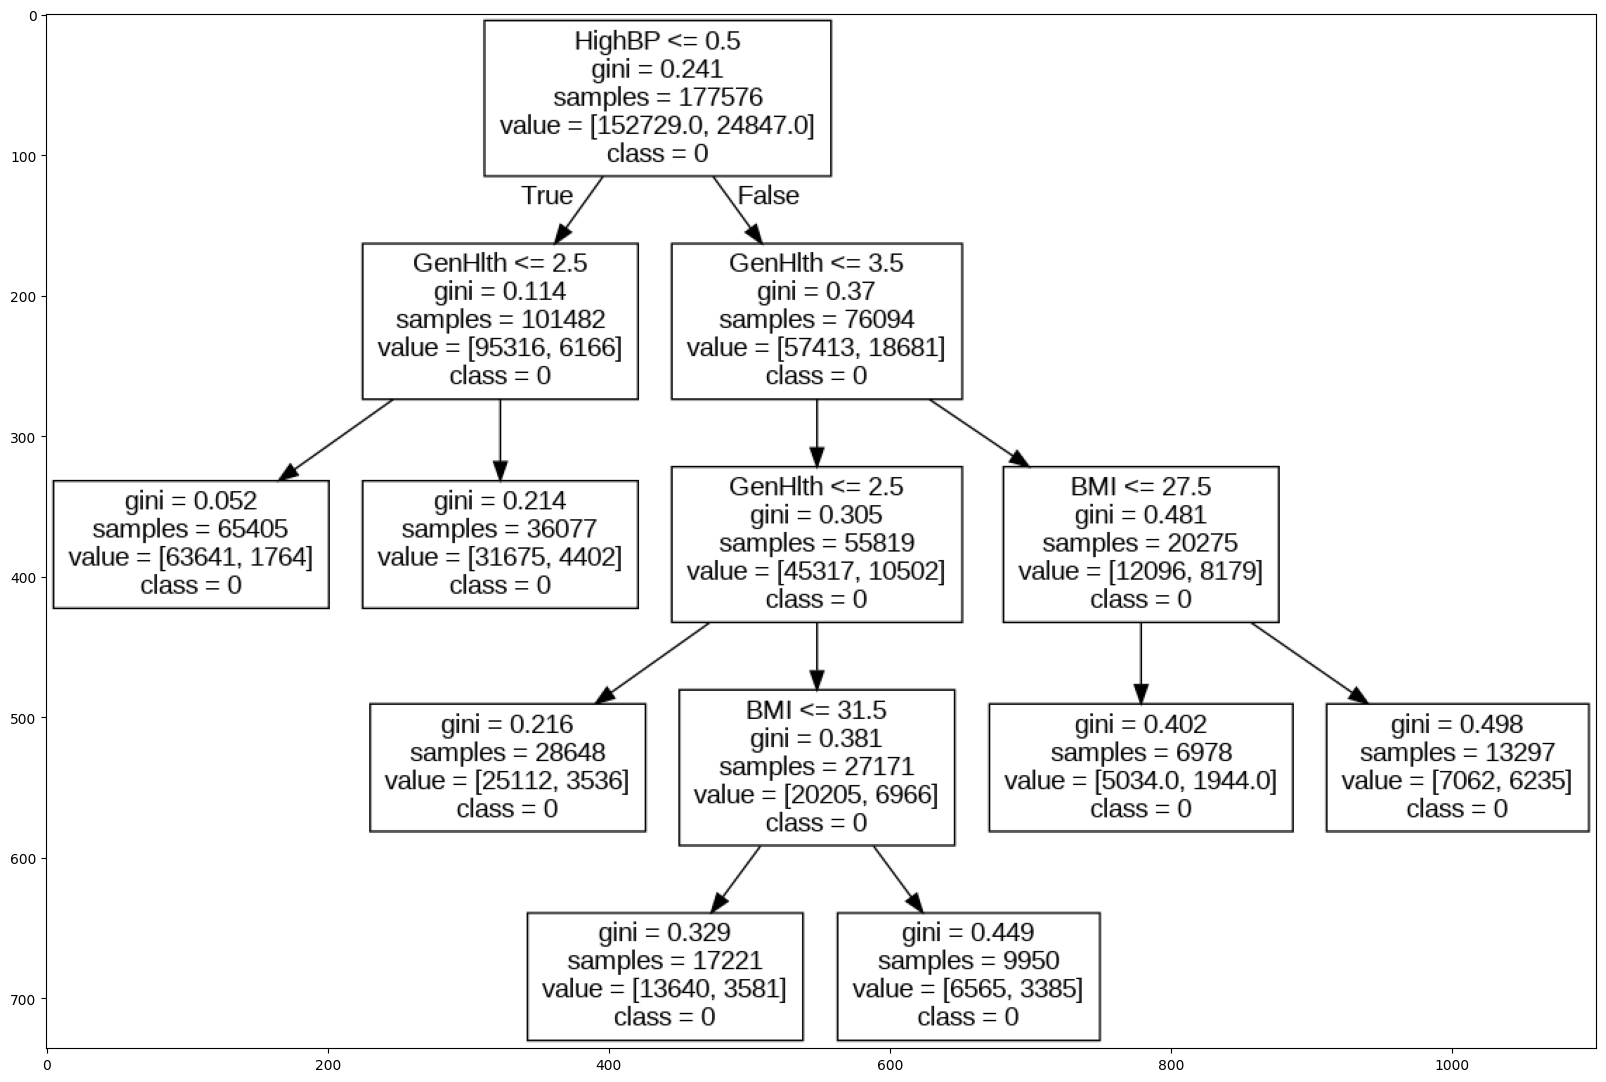

In [ ]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

# Make Predictions on the training and test data

In [ ]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)



## Assess Model on Training and Test data

In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8607
Precision: 0.0000
Recall.  : 0.0000

 -- test set -- 
Accuracy : 0.8607
Precision: 0.0000
Recall.  : 0.0000


#Generate a confusion matrix for the training and test data

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[152729  24847]
 [     0      0]]
[[65605 10499]
 [    0     0]]


#Generate ROC curves for training and test data

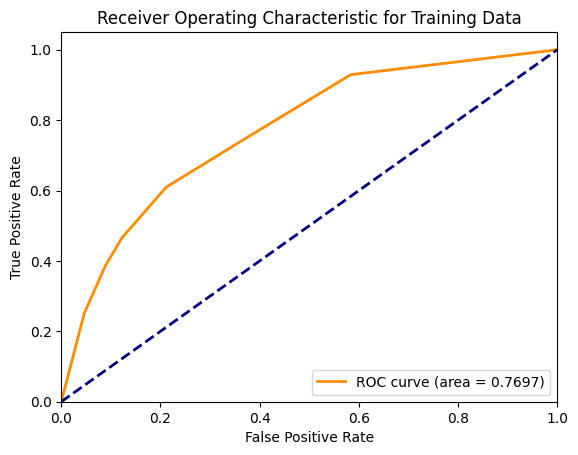

In [ ]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

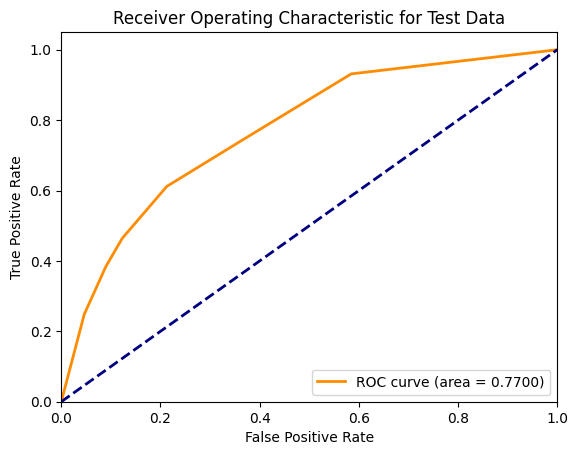

In [ ]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


#Print feature importance for the tree

    importance               feature
0     0.510736                HighBP
13    0.394263               GenHlth
3     0.095001                   BMI
31    0.000000           Education_3
24    0.000000                 Age_8
25    0.000000                 Age_9
26    0.000000                Age_10
27    0.000000                Age_11
28    0.000000                Age_12
29    0.000000                Age_13
30    0.000000           Education_2
32    0.000000           Education_4
22    0.000000                 Age_6
33    0.000000           Education_5
34    0.000000           Education_6
35    0.000000              Income_2
36    0.000000              Income_3
37    0.000000              Income_4
38    0.000000              Income_5
39    0.000000              Income_6
40    0.000000              Income_7
23    0.000000                 Age_7
21    0.000000                 Age_5
1     0.000000              HighChol
10    0.000000     HvyAlcoholConsump
2     0.000000             CholCheck
4

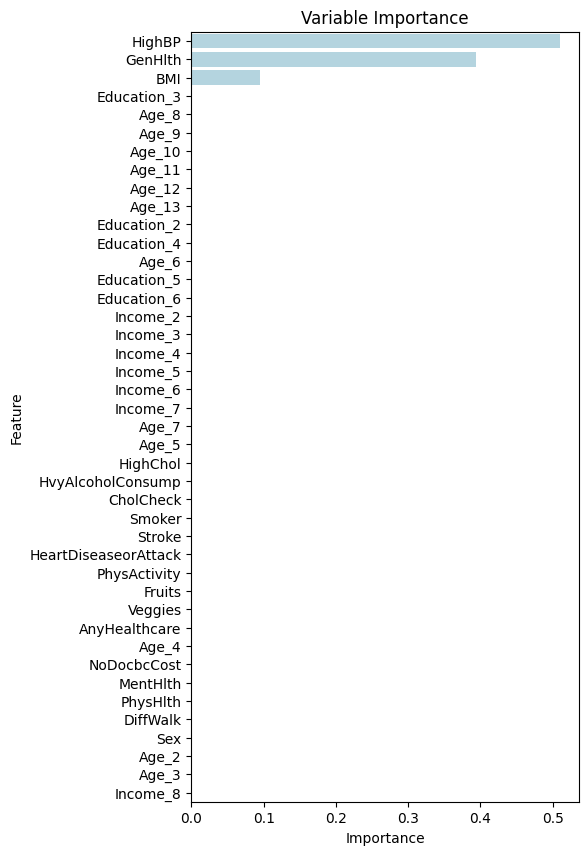

In [ ]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

#Tune Parameters of the Classification Tree

In [ ]:
dt_tune = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(dt_tune, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)
print(best_estimator)

{'ccp_alpha': 0, 'max_depth': 5, 'min_samples_leaf': 1}
DecisionTreeClassifier(ccp_alpha=0, max_depth=5)


# Random Forest  
We will use 2 primary parameters to control the construction of the random forest

- **n_estimators** determines the number of bootstrap samples to be taken or in other words the number of trees to be generated. Default value = 100

- **max_features** determines the number of x-variables to be used in each tree. Default value = "sqrt".  

Parameters are also availabe to control the growth of the tree.  By default, you should let the trees grow without restriction.  However, you may need to adjust these parameters if the random forest is overfitting.

- **min_samples_leaf** determines the minimum number of observations that must remain in a leaf.  If a split leaves fewer than this number of observations, the split cannot be performed.  Larger values help to prevent overfitting.  Default value = 1.

- **max_depth** determines the maximum number of levels for the tree. Smaller values help to prevent overfitting. Default value = None


In [16]:
# create an instance of a random forest classifier using default values

#rf = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=904)

# fit the model to the training data
#rf.fit(X_train, y_train)

# create an instance of a random forest classifier using default values and overfitting controls

#rf = RandomForestClassifier(n_estimators=100, max_features="sqrt", max_depth=5, min_samples_leaf=100, random_state=904)

# fit the model to the training data
#rf.fit(X_train, y_train)

#'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 150

# create an instance of a random forest classifier using tuned values

rf = RandomForestClassifier(n_estimators=150, max_features=6, max_depth=None, min_samples_leaf=1, random_state=904)

# fit the model to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=6, n_estimators=150, random_state=904)

In [17]:
# make predictions on the training and test data
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

y_prob_train_rf = rf.predict_proba(X_train)
y_prob_test_rf = rf.predict_proba(X_test)



In [18]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_rf)
prec_train = precision_score(y_train, y_pred_train_rf)
rec_train = recall_score(y_train, y_pred_train_rf)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_rf)
prec_test = precision_score(y_test, y_pred_test_rf)
rec_test = recall_score(y_test, y_pred_test_rf)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.9948
Precision: 0.9961
Recall.  : 0.9668

 -- test set -- 
Accuracy : 0.8600
Precision: 0.4930
Recall.  : 0.1631


# Tuning the parameters of a random forest - RUN WITH CAUTION

This section of code illustrates one method for tuning the parameters of a random forest model.  Because the code is doing a grid search over multiple complex models, this code can take over an hour to run.

In [ ]:
rf_tune = RandomForestClassifier()

param_grid = {
    'n_estimators':[10, 50, 150, 500],
    'max_features':['sqrt', 2, 4, 6],
    'max_depth': [None, 5],
    'min_samples_leaf': [1, 100],
}

grid_search = GridSearchCV(rf_tune, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)
print(best_estimator)

{'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1, 'n_estimators': 150}
RandomForestClassifier(max_features=6, n_estimators=150)



# Gradient Boosting  
We will use 2 primary parameters to control the boosting

- **n_estimators** determines the number of bootstrap samples to be taken or in other words the number of trees to be generated. Default value = 100

- **learning_rate** is the shrinkage parameter (lambda) which controls the sequential weighting. Default value = 0.1.  

Parameters are also availabe to control the growth of the tree.  By default, gradient boosting models grow shallow trees that use all of the input variables.

- **max_depth** determines the maximum number of levels for the tree. Smaller values help to prevent overfitting. Default value = 3



In [6]:

# create an instance of the Gradient Boosting Classifier using default values

gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth=3, random_state=904)


# fit the model to the training data
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=904)

In [7]:
# make predictions on the training and test data
y_pred_train_gb = gb.predict(X_train)
y_pred_test_gb = gb.predict(X_test)

y_prob_train_gb = gb.predict_proba(X_train)
y_prob_test_gb = gb.predict_proba(X_test)


In [9]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_gb)
prec_train = precision_score(y_train, y_pred_train_gb)
rec_train = recall_score(y_train, y_pred_train_gb)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_gb)
prec_test = precision_score(y_test, y_pred_test_gb)
rec_test = recall_score(y_test, y_pred_test_gb)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8674
Precision: 0.5846
Recall.  : 0.1670

 -- test set -- 
Accuracy : 0.8652
Precision: 0.5572
Recall.  : 0.1590
